In [3]:
import pandas as pd

# Let's create a tiny fake dataset to see how it works
sample_data = {
    'headline': ['BREAKING: Aliens Found!!!', 'Local Elections Results Announced', 'YOU WONT BELIEVE THIS!!!'],
    'label': ['fake', 'real', 'fake']
}

df = pd.DataFrame(sample_data)
print(df)

                            headline label
0          BREAKING: Aliens Found!!!  fake
1  Local Elections Results Announced  real
2           YOU WONT BELIEVE THIS!!!  fake


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
fake_df = pd.read_csv('Fake.csv')
real_df = pd.read_csv('True.csv')

# Add labels
fake_df['label'] = 'fake'
real_df['label'] = 'real'

# Combine them
df = pd.concat([fake_df, real_df], ignore_index=True)

print(f"✅ Dataset loaded successfully!")
print(f"Total articles: {len(df)}")
print(f"Fake articles: {len(fake_df)}")
print(f"Real articles: {len(real_df)}")

✅ Dataset loaded successfully!
Total articles: 44898
Fake articles: 23481
Real articles: 21417


In [2]:
import os
print("Files in current directory:")
print(os.listdir())

Files in current directory:
['.ipynb_checkpoints', 'day1.ipynb', 'day1pt2.ipynb', 'Fake.csv', 'True.csv', 'Untitled.ipynb', 'Untitled1.ipynb']


In [3]:
import pandas as pd

print("Starting to load data...")

fake_df = pd.read_csv('Fake.csv')
print("✅ Fake.csv loaded!")

real_df = pd.read_csv('True.csv')
print("✅ True.csv loaded!")

fake_df['label'] = 'fake'
real_df['label'] = 'real'

df = pd.concat([fake_df, real_df], ignore_index=True)

print(f"\n✅ Dataset loaded successfully!")
print(f"Total articles: {len(df)}")
print(f"Fake articles: {len(fake_df)}")
print(f"Real articles: {len(real_df)}")

Starting to load data...
✅ Fake.csv loaded!
✅ True.csv loaded!

✅ Dataset loaded successfully!
Total articles: 44898
Fake articles: 23481
Real articles: 21417


In [4]:
# Look at first few rows
print("\n📰 Sample data:")
print(df.head())

# Check columns
print("\n📊 Columns in dataset:")
print(df.columns.tolist())

# Check for missing data
print("\n🔍 Missing values:")
print(df.isnull().sum())


📰 Sample data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  
0  December 31, 2017  fake  
1  December 31, 2017  fake  
2  December 30, 2017  fake  
3  December 29, 2017  fake  
4  December 25, 2017  fake  

📊 Columns in dataset:
['title', 'text', 'subject', 'date', 'label']

🔍 Missing values:


In [5]:
# Show a fake news example
print("\n" + "="*70)
print("❌ FAKE NEWS EXAMPLE:")
print("="*70)
print("\nTitle:", df[df['label']=='fake'].iloc[0]['title'])
print("\nFirst 500 characters of article:")
print(df[df['label']=='fake'].iloc[0]['text'][:500])

print("\n" + "="*70)
print("✅ REAL NEWS EXAMPLE:")
print("="*70)
print("\nTitle:", df[df['label']=='real'].iloc[0]['title'])
print("\nFirst 500 characters of article:")
print(df[df['label']=='real'].iloc[0]['text'][:500])


❌ FAKE NEWS EXAMPLE:

Title:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing

First 500 characters of article:
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a gr

✅ REAL NEWS EXAMPLE:

Title: As U.S. budget fight looms, Republicans flip their fiscal script

First 500 characters of article:
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday an

In [6]:
# Article length comparison
df['text_length'] = df['text'].str.len()
df['title_length'] = df['title'].str.len()

print("\n📏 Length Comparison:")
print(f"Fake news - Avg article length: {df[df['label']=='fake']['text_length'].mean():.0f} characters")
print(f"Real news - Avg article length: {df[df['label']=='real']['text_length'].mean():.0f} characters")
print(f"\nFake news - Avg title length: {df[df['label']=='fake']['title_length'].mean():.0f} characters")
print(f"Real news - Avg title length: {df[df['label']=='real']['title_length'].mean():.0f} characters")

# Subject distribution
print("\n📚 Topics covered:")
print(df.groupby(['label', 'subject']).size().unstack(fill_value=0))


📏 Length Comparison:
Fake news - Avg article length: 2547 characters
Real news - Avg article length: 2383 characters

Fake news - Avg title length: 94 characters
Real news - Avg title length: 65 characters

📚 Topics covered:
subject  Government News  Middle-east  News  US_News  left-news  politics  \
label                                                                       
fake                1570          778  9050      783       4459      6841   
real                   0            0     0        0          0         0   

subject  politicsNews  worldnews  
label                             
fake                0          0  
real            11272      10145  


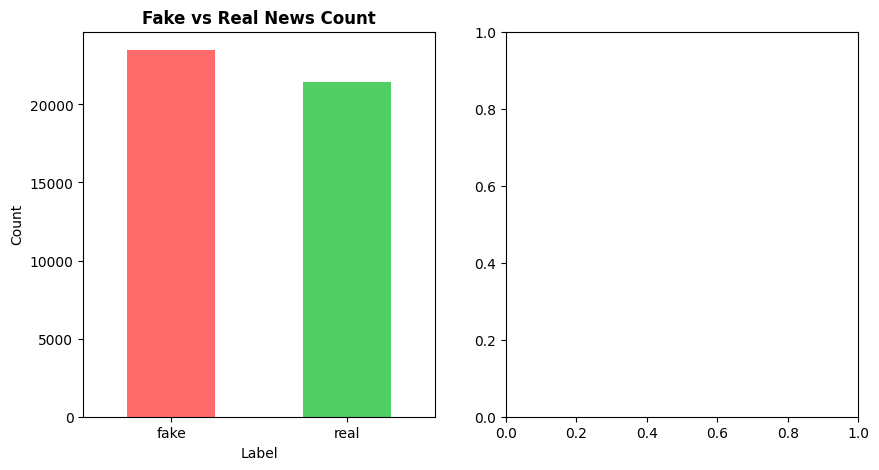

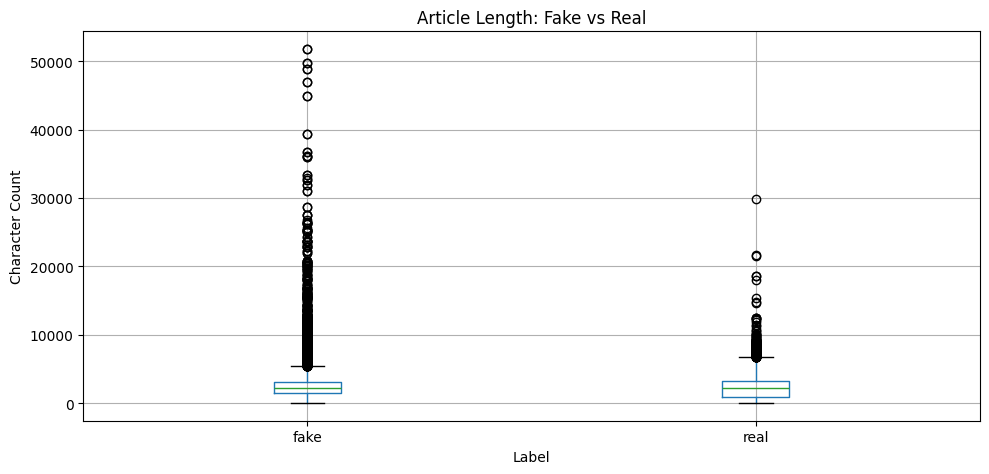

In [7]:
# Visualization 1: Fake vs Real count
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['#ff6b6b', '#51cf66'])
plt.title('Fake vs Real News Count', fontsize=12, fontweight='bold')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Visualization 2: Article length comparison
plt.subplot(1, 2, 2)
df.boxplot(column='text_length', by='label', figsize=(10,5))
plt.title('Article Length: Fake vs Real')
plt.suptitle('')  # Remove default title
plt.xlabel('Label')
plt.ylabel('Character Count')

plt.tight_layout()
plt.show()